<a href="https://colab.research.google.com/github/JoongseokPark/machine_learning_2023/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_6%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

# 경하사강법

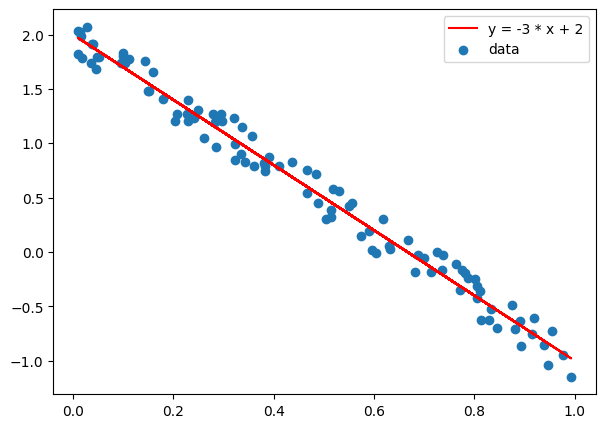

w : -3, b : 2


In [14]:
def linear(w=0.5,b=0.8,size=50,noise=1.0):
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size = y.shape)
  yy = y + noise
  plt.figure(figsize=(7,5))
  plt.plot(x,y,color="r", label=f"y = {w} * x + {b}")
  plt.scatter(x,yy,label='data')
  plt.legend(fontsize=10)
  plt.show()
  print(f"w : {w}, b : {b}")
  return x, yy

x, y = linear(w=-3,b=2,size=100,noise=0.2)

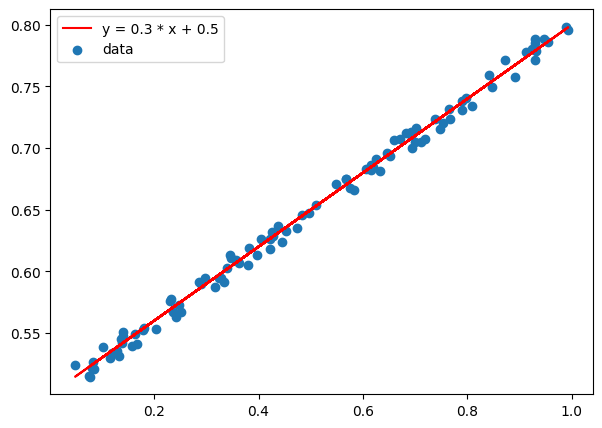

w : 0.3, b : 0.5


In [37]:
x, y = linear(w=0.3,b=0.5,size=100,noise=0.01)

In [ ]:
#반복횟수
NUM_epochs = 1000

#학습률
learning_rate = 0.001

#에러 수치 기록
errors = []

#난수로 w와 b 초기화
w = np.random.uniform(low = 0.0, high = 1.0)
b = np.random.uniform(low = 0.0, high = 1.0)

for epoch in range(NUM_epochs):
  #y hat 즉 예측치 정의
  y_hat = w * x + b

  #Loss 정의
  error = 0.5 * ((y_hat - y) ** 2).sum()
  if error < 0.001:
    break
  
  #미분 계산
  w = w - learning_rate * ((y_hat - y) * x).sum()
  b = b - learning_rate * (y_hat - y).sum()

  errors.append(error)

  if epoch % 20 == 0:
    print(f"epoch = {epoch} : w = {w:.3f} : b = {b:.3f} : error = {error:.3f}")

#학습 종료 후 결과 출력
print("====" * 10)
print(f"epoch = {epoch} : w = {w:.3f} : b = {b:.3f} : error = {error:.3f}")

##단순 선형 회귀 모델

1. 데이터 생성
2. 단순 선형 회귀 모델 만들기
3. 컴파일 model.compile()
4. 훈련 model.fit()
5. 검증 model.evaluate() 
6. 예측 model.predict()

In [27]:
#데이터셋
x = np.arange(1,6)
y = 3 * x + 2

In [28]:
#모델 만들기
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

In [29]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [30]:
#컴파일
model1.compile(optimizer='sgd', loss = 'mse', metrics = ['mae'])

In [ ]:
#훈련
history1 = model1.fit(x,y,epochs=500)

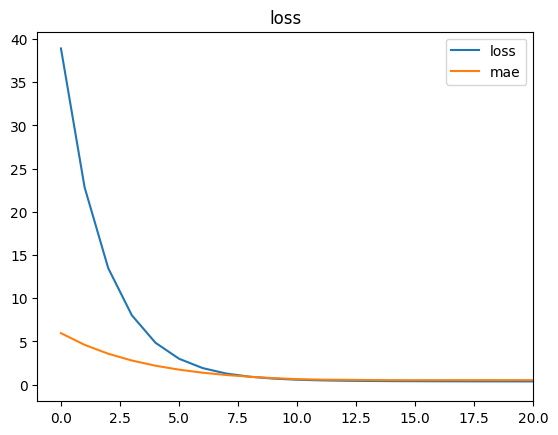

In [32]:
#시각화
plt.plot(history1.history['loss'],label = 'loss')
plt.plot(history1.history['mae'],label = 'mae')
plt.xlim(-1,20) #x축의 한계를 -1~20으로 지정
plt.title("loss")
plt.legend()
plt.show()

In [33]:
#검증
model1.evaluate(x,y)

1/1 [==============================] - 0s 146ms/step - loss: 0.0142 - mae: 0.1023


[0.014196008443832397, 0.10226640850305557]

In [ ]:
#예측
model1.predict()[5]

#과제 내용

- 5주차 내용에서 이어짐

1. 수치 변화시키며 과정 돌려보기

> 학습률 [0.1, 0.01, 0.001] , 학습 횟수 [5, 50, 500]

2. 학습 종료 조건을 MSE의 수치가 아니라 MSE의 변화로 정하기

> 예) 이전 mse가 0.01이였는데 이번 mse도 0.01이면 종료